# **Fake News Detection project**

With the rapid growth of digital media, large amounts of textual information are generated every day. Manually analyzing and categorizing this data is difficult and time-consuming. Therefore, there is a need for an automated system that can process text efficiently and classify it accurately using Natural Language Processing and Machine Learning techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load** **dataset**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(subset='all')

data = pd.DataFrame({
    "text": dataset.data,
    "label": dataset.target
})

data.head()

,text,label
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


**Converting multi-class to binary (0 and 1)**

In [ ]:
data["label"] = data["label"] % 2

data["label"].value_counts()

,count
label,
1,9473
0,9373


**Prediction model**

In [ ]:
from sklearn.model_selection import train_test_split

X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (15076,)
Testing size: (3770,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (15076, 148989)


**Training Logistic Regression Model**

Logistic Regression is a supervised machine learning algorithm used for classification problems. It predicts the probability of a data point belonging to a particular class using a sigmoid function.

In this project, Logistic Regression is used to classify text data into two categories based on the extracted TF-IDF features. It is efficient, simple, and performs well for binary text classification tasks.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model Training Completed")

Model Training Completed


**Predictions & Accuracy Check**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9238726790450928


**Confusion Matrix**

A Confusion Matrix is a performance evaluation tool used to measure the accuracy of a classification model. It compares the actual values with the predicted values.

It consists of:

True Positives (TP) – Correct positive predictions

True Negatives (TN) – Correct negative predictions

False Positives (FP) – Incorrect positive predictions

False Negatives (FN) – Incorrect negative predictions

In this project, the confusion matrix helps evaluate how well the model classifies text into the correct category.

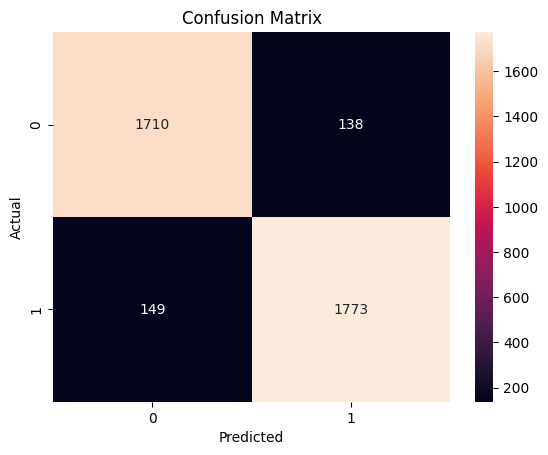

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model can now predict the category of new unseen text input.

In [16]:
def predict_news(text):                                    #(custom predection)
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)

    if prediction[0] == 0:
        return "Class 0 (Category A)"
    else:
        return "Class 1 (Category B)"

In [17]:
 #Testing With Custom Input
sample_text = "The government announced new policies regarding space research and science funding."

result = predict_news(sample_text)
print("Prediction:", result)

Prediction: Class 0 (Category A)
